<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Arya Jalali
### Student Number : 98105665
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
a = np.array([1,2])
b = np.array([1,4])
np.not_equal(a,b) * 2 - 1

array([-1,  1])

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [18]:
#import train_test_split
from sklearn.model_selection import train_test_split
#TODO
# Load the dataset
# Path: HW3_ ML Models for Tabular Datasets.ipynb
df = pd.read_csv('heart_disease.csv')
df.head()
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

y_train = 2 * y_train - 1
y_test = 2 * y_test - 1 


### Adaboost Algorithm Implementation (40 points)

In [19]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    return (sum(w * (np.not_equal(y, y_pred))) / sum(w))

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return 1/2 * np.log((1 - error) / (error))
    
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    return w * np.exp(alpha * (np.not_equal(y, y_pred) * 2 - 1))


class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            
            if m == 0:
                w = np.ones(len(X)) / len(X)
                 
            else:
                w = update_weights(w, self.alphas[m-1], y, y_pred)

               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            G_m = DecisionTreeClassifier(max_depth=1)
            G_m.fit(X, y, sample_weight=w)
            y_pred = G_m.predict(X)
            self.G_M.append(G_m)


            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            error_m = calculate_error(y, y_pred, w)
            self.training_errors.append(error_m)


            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            alpha_m = calculate_alpha(error_m)
            self.alphas.append(alpha_m)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds[m] = y_pred_m

        y_pred = np.sign(weak_preds.T.sum())

        return y_pred

### Training and Evaluation (20 points)

In [20]:
#TODO : Fit model
ab = AdaBoost()
ab.fit(X_train, y_train, M=100)


#TODO : Predict on test data
y_pred = ab.predict(X_test)

#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Accuracy:  0.8341463414634146
Precision:  0.8165137614678899
Recall:  0.8640776699029126
F1:  0.839622641509434


In [21]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Accuracy:  0.8780487804878049
Precision:  0.89
Recall:  0.8640776699029126
F1:  0.8768472906403941


### Early Stopping (15 points)

In [23]:
#TODO : Calculate validation error for different number of estimators 
# and plot it against number of estimators
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

scores = []
models = []
weighted_training_scores = []
for i in range(1, 100):
    ab = AdaBoostClassifier(n_estimators=i)
    ab.fit(X_train, y_train)
    scores.append(1 - accuracy_score(y_test, ab.predict(X_test)))
    models.append(ab)

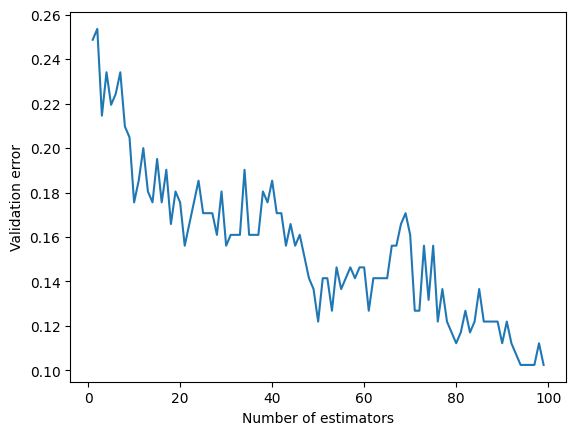

In [24]:
#TODO : Plot validation error versus number of estimators figure.

#plot
plt.plot(range(1, 100), scores)
plt.xlabel('Number of estimators')
plt.ylabel('Validation error')
plt.show()

In [25]:
#TODO : Print the best number for estimators and minimum value for validation error.
print('Best number of estimators: ', np.argmin(scores) + 1)
print('Minimum validation error: ', np.min(scores))

Best number of estimators:  94
Minimum validation error:  0.10243902439024388


### Weighted Error (10 points)

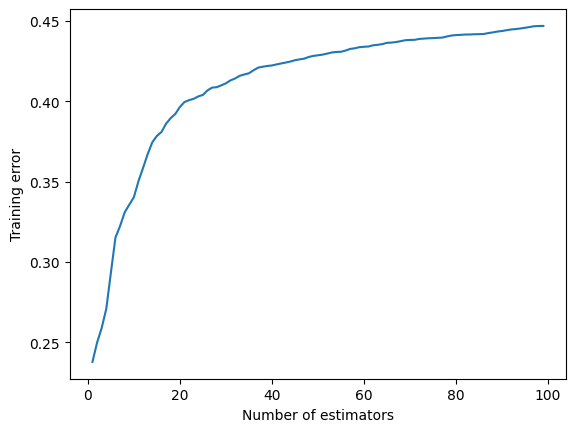

In [28]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
weighted_erros = []
for model in models:
    weighted_erros.append(np.sum(np.array(model.estimator_errors_) * np.array(model.estimator_weights_)) / np.sum(model.estimator_weights_)) 
plt.plot(np.arange(1,100), weighted_erros)
plt.xlabel('Number of estimators')
plt.ylabel('Training error')
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

In the course of boosting iterations the weak classifiers are forced to try to classify more difficult examples. The weights will increase for examples that are repeatedly misclassified by the weak classifiers. The weighted training error $\epsilon_t$ of the $t^{th}$ weak classifier on the training data therefore tends to increase.